<a href="https://colab.research.google.com/github/adrenalinovaya/RL/blob/main/A2C_DDPG_%D0%B4%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install torch==1.13.1 --extra-index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cpu
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 MB 4.0 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.4.0+cu121
    Uninstalling torch-2.4.0+cu121:
      Successfully uninstalled torch-2.4.0+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.4.0+cu121 requires torch==2.4.0, but you have torch 1.13.1+cpu which is incompatible.
torchvision 0.19.0+cu121 requires torch==2.4.0, but you have torch 1.13.1+cpu which is incompatible.


In [3]:
# @title установка библиотек
!pip install rarfile --quiet
!pip install stable-baselines3[extra] --quiet
!pip install ale-py --quiet
!pip install gym[box2d] --quiet
!pip install pyvirtualdisplay --quiet
!pip install pyglet --quiet
!pip install pygame --quiet
!pip install minigrid --quiet
!pip install -q swig --quiet
!pip install -q gymnasium[box2d] --quiet
!pip install 'minigrid<=2.1.1' --quiet
!pip3 install box2d-py --quiet


# @title установка драйверов
!apt-get update > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!apt-get install -y swig build-essential python-dev python3-dev > /dev/null 2>&1
!apt-get install x11-utils > /dev/null 2>&1
!apt-get install xvfb > /dev/null 2>&1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 13.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 98.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 78.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel

In [4]:
!pip install TensorFlow==v2.16.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 55.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: TensorFlow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.16.1 w

In [5]:
import random
import numpy as np
import gymnasium as gym
import torch
import torch.nn as nn
from torch.nn import functional as F

from tqdm import tqdm

In [6]:
import torch.optim as optim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
class OrnsteinUhlenbeckActionNoise:
    def __init__(self, mu, sigma, theta=.15, dt=1e-2, x0=None):
        self.theta = theta
        self.mu = mu
        self.sigma = sigma
        self.dt = dt
        self.x0 = x0
        self.reset()

    def __call__(self):
        x = self.x_prev + self.theta * (self.mu - self.x_prev) * self.dt + self.sigma * np.sqrt(self.dt) * np.random.normal(size=self.mu.shape)
        self.x_prev = x
        return x

    def reset(self):
        self.x_prev = self.x0 if self.x0 is not None else np.zeros_like(self.mu)

ou_action_noise = OrnsteinUhlenbeckActionNoise(mu=np.zeros(1), sigma=np.ones(1) * 0.05)

In [ ]:
import copy
import random
from collections import deque, namedtuple

import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

"""
Hyperparameters:

actor_layer_sizes
critic_layer_sizes
max_buffer_size
tau
max_time_steps
max_episodes
actor_lr
critic_lr
GAMMA
update_after
batch_size
"""

device = torch.device("cpu")
dtype = torch.double

Transition = namedtuple(
    "Transition", ("state", "action", "reward", "next_state", "done")
)


class agent:
    def __init__(
        self,
        env,
        actor_layer_sizes=[32, 32],
        critic_layer_sizes=[64, 64],
        max_buffer_size=1000000,
    ):
        self.env = env
        (
            self.actor,
            self.critic,
            self.target_actor,
            self.target_critic,
        ) = self.make_models(actor_layer_sizes, critic_layer_sizes)
        self.replay_buffer = deque(maxlen=max_buffer_size)
        self.max_buffer_size = max_buffer_size

    def make_models(self, actor_layer_sizes, critic_layer_sizes):
        actor = (
            nn.Sequential(
                nn.Linear(
                    self.env.observation_space.shape[0],
                    actor_layer_sizes[0],
                ),
                nn.ReLU(),
                nn.Linear(actor_layer_sizes[0], actor_layer_sizes[1]),
                nn.ReLU(),
                nn.Linear(
                    actor_layer_sizes[1], self.env.action_space.shape[0]
                ), nn.Tanh()
            )
            .to(device)
            .to(dtype)
        )

        critic = (
            nn.Sequential(
                nn.Linear(
                    self.env.observation_space.shape[0]
                    + self.env.action_space.shape[0],
                    critic_layer_sizes[0],
                ),
                nn.ReLU(),
                nn.Linear(critic_layer_sizes[0], critic_layer_sizes[1]),
                nn.Linear(critic_layer_sizes[1], 1),
            )
            .to(device)
            .to(dtype)
        )

        target_actor = copy.deepcopy(actor)    # Create a target actor network

        target_critic = copy.deepcopy(critic)   # Create a target critic network

        return actor, critic, target_actor, target_critic

    def select_action(self, state, noise_factor):         # Selects an action in exploratory manner
      with torch.no_grad():
        noisy_action = self.actor(state) + noise_factor * torch.randn(size = self.env.action_space.shape, device=device, dtype=dtype)
        action = torch.clamp(noisy_action, self.env.action_space.low[0], self.env.action_space.high[0])

        return action

    def store_transition(self, state, action, reward, next_state, done):             # Stores the transition to the replay buffer with a default maximum capacity of 2500
        if len(self.replay_buffer) < self.max_buffer_size:
            self.replay_buffer.append(
                Transition(state, action, reward, next_state, done)
            )
        else:
            self.replay_buffer.popleft()
            self.replay_buffer.append(
                Transition(state, action, reward, next_state, done)
            )

    def sample_batch(self, batch_size=128):                                            # Samples a random batch of transitions for training
      return Transition(
            *[torch.cat(i) for i in [*zip(*random.sample(self.replay_buffer, min(len(self.replay_buffer), batch_size)))]]
        )


    def train(
        self,
        GAMMA=0.99,
        actor_lr=0.001,
        critic_lr=0.001,
        tau=0.001,
        max_time_steps=5000,
        max_episodes=200,
        update_after=1,
        batch_size=64,
        noise_factor=np.random.normal() #0.2,
    ):

        self.train_rewards_list = []
        actor_optimizer = optim.Adam(self.actor.parameters(), lr=actor_lr)
        critic_optimizer = optim.Adam(
            self.critic.parameters(), lr=critic_lr
        )
        print("Starting Training:\n")
        for e in range(max_episodes):
            state = self.env.reset()
            state = torch.tensor(state, device=device, dtype=dtype).unsqueeze(0)
            episode_reward = 0
            for t in range(max_time_steps):
                #self.env.render()
                action = self.select_action(state, noise_factor)
                next_state, reward, done, _ = self.env.step(action[0])         # Sample a transition
                episode_reward += reward

                next_state = torch.tensor(next_state, device=device, dtype=dtype).unsqueeze(0)
                reward = torch.tensor(
                    [reward], device=device, dtype=dtype
                ).unsqueeze(0)
                done = torch.tensor(
                    [done], device=device, dtype=dtype
                ).unsqueeze(0)

                self.store_transition(
                    state, action, reward, next_state, done
                )                # Store the transition in the replay buffer

                state = next_state

                sample_batch = self.sample_batch(64)

                with torch.no_grad():                 # Determine the target for the critic to train on
                  target = sample_batch.reward + (1 - sample_batch.done) * GAMMA * self.target_critic(torch.cat((sample_batch.next_state, self.target_actor(sample_batch.next_state)), dim=1))

                # Train the critic on the sampled batch
                critic_loss = nn.MSELoss()(
                    target,
                    self.critic(
                        torch.cat(
                            (sample_batch.state, sample_batch.action), dim=1
                        )
                    ),
                )

                critic_optimizer.zero_grad()
                critic_loss.backward()
                critic_optimizer.step()

                actor_loss = -1 * torch.mean(
                  self.critic(torch.cat((sample_batch.state, self.actor(sample_batch.state)), dim=1))
                  )

                #Train the actor
                actor_optimizer.zero_grad()
                actor_loss.backward()
                actor_optimizer.step()


                #if (((t + 1) % update_after) == 0):
                for actor_param, target_actor_param in zip(self.actor.parameters(), self.target_actor.parameters()):
                  target_actor_param.data = tau * actor_param.data + (1 - tau) * target_actor_param.data

                for critic_param, target_critic_param in zip(self.critic.parameters(), self.target_critic.parameters()):
                  target_critic_param.data = tau * critic_param.data + (1 - tau) * target_critic_param.data

                if done:
                    print(
                        "Completed episode {}/{}".format(
                            e + 1, max_episodes
                        )
                    )
                    break

            self.train_rewards_list.append(episode_reward)

        self.env.close()
        print(self.train_rewards_list)

    def plot(self, plot_type):
        if (plot_type == "train"):
            plt.plot(self.train_rewards_list)
            plt.show()
        elif (plot_type == "test"):
            plt.plot(self.test_rewards_list)
            plt.show()
        else:
            print("\nInvalid plot type")

Starting Training:



/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Completed episode 1/250
Completed episode 2/250
Completed episode 3/250
Completed episode 4/250
Completed episode 5/250
Completed episode 6/250
Completed episode 7/250
Completed episode 8/250
Completed episode 9/250
Completed episode 10/250
Completed episode 11/250
Completed episode 12/250
Completed episode 13/250
Completed episode 14/250
Completed episode 15/250
Completed episode 16/250
Completed episode 17/250
Completed episode 18/250
Completed episode 19/250
Completed episode 20/250
Completed episode 21/250
Completed episode 22/250
Completed episode 23/250
Completed episode 24/250
Completed episode 25/250
Completed episode 26/250
Completed episode 27/250
Completed episode 28/250
Completed episode 29/250
Completed episode 30/250
Completed episode 31/250
Completed episode 32/250
Completed episode 33/250
Completed episode 34/250
Completed episode 35/250
Completed episode 36/250
Completed episode 37/250
Completed episode 38/250
Completed episode 39/250
Completed episode 40/250
Completed

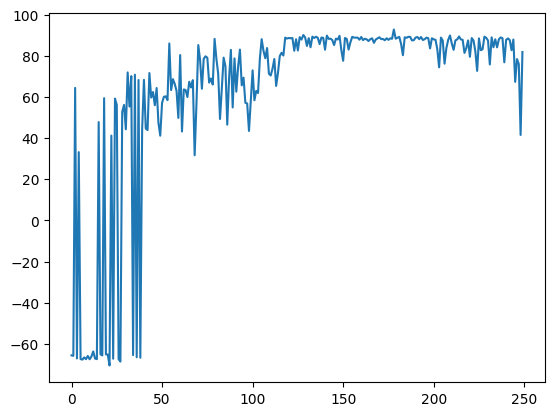

In [ ]:
import gym

env = gym.make("MountainCarContinuous-v0")

myagent = agent(env)
myagent.train(max_episodes=250)
myagent.plot("train")

###DDPG


In [7]:
from stable_baselines3 import DDPG
from stable_baselines3.common.env_util import make_vec_env
import os
import time
import numpy as np
from stable_baselines3.ddpg.policies import MlpPolicy
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
from stable_baselines3.common.callbacks import EvalCallback

/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(


In [8]:
# Saving logs to visulise in Tensorboard, saving models
models_dir = f"models/Mountain-{time.time()}"
logdir = f"logs/Mountain-{time.time()}"

if not os.path.exists(models_dir):
    os.makedirs(models_dir)

if not os.path.exists(logdir):
    os.makedirs(logdir)

In [27]:
env = make_vec_env("MountainCarContinuous-v0", n_envs=1)
n_actions = env.action_space.shape[-1]
action_noise = OrnsteinUhlenbeckActionNoise(mean=np.zeros(n_actions), sigma=float(0.5) * np.ones(n_actions))
param_noise = None

eval_callback = EvalCallback(env, best_model_save_path="./logs/best_model/",
                             log_path="./logs/", eval_freq=1000, #deterministic=True,
                             render=False)

model = DDPG(MlpPolicy, env, verbose=1, action_noise=action_noise)
model.learn(20000, callback = eval_callback)



Using cpu device
Eval num_timesteps=1000, episode_reward=-99.90 +/- 0.00
Episode length: 999.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 999      |
|    mean_reward     | -99.9    |
| time/              |          |
|    total_timesteps | 1000     |
| train/             |          |
|    actor_loss      | -1.38    |
|    critic_loss     | 22.2     |
|    learning_rate   | 0.001    |
|    n_updates       | 899      |
---------------------------------
New best mean reward!
Eval num_timesteps=2000, episode_reward=-99.90 +/- 0.00
Episode length: 999.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 999      |
|    mean_reward     | -99.9    |
| time/              |          |
|    total_timesteps | 2000     |
| train/             |          |
|    actor_loss      | -1.84    |
|    critic_loss     | 0.303    |
|    learning_rate   | 0.001    |
|    n_updates       | 1899     |
---

In [55]:
from numpy import load
data = load('./logs/evaluations.npz')
lst = data.files
for item in lst:
    print(item)
    print(data[item])
print(data['results'][14])

timesteps
[ 1000  2000  3000  4000  5000  6000  7000  8000  9000 10000 11000 12000
 13000 14000 15000 16000 17000 18000 19000 20000]
results
[[-99.89999  -99.899983 -99.899994 -99.899987 -99.899995]
 [-99.9      -99.9      -99.9      -99.9      -99.9     ]
 [ -1.377845  -1.684519  -1.685828  -1.652514  -1.468699]
 [ -0.653901  -0.528573  -0.451036  -0.650978  -0.51008 ]
 [-15.479395 -15.653315 -15.485704 -15.476278 -15.88567 ]
 [ 37.671245 -89.683065 -89.189666  30.073676  45.682864]
 [ 35.186454  76.797261  76.666266  77.1687   -96.130191]
 [ 71.260793  87.081414  69.769334  79.725918  79.398931]
 [ 84.647083  88.360848  88.502618  81.820372  88.463168]
 [ 86.238524  83.510176  89.495846  84.315469  89.473712]
 [ 89.955816  88.478699  90.032956  75.258227  88.746953]
 [-19.514387  79.013234  89.883527  88.664299 -19.453376]
 [ 91.031695  90.862974  91.512584  91.494335  86.765701]
 [ 92.511209  91.438616  91.637518  90.128071  87.963644]
 [ 93.504474  93.491719  93.576315  93.411818  

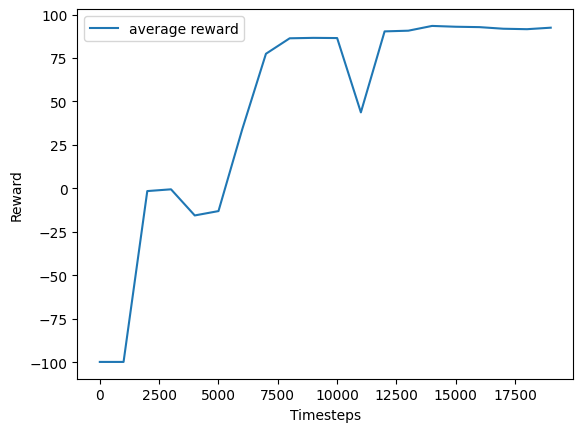

In [65]:
import matplotlib.pyplot as plt


average_reward = []
for idx in range(len(data['results'])):
    avg_list = data['results'][idx]
    average_reward.append(np.average(avg_list))
x = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000]
#plt.plot(reward_records, label='reward')
plt.plot(x, average_reward, label='average reward')
plt.xlabel('Timesteps')
plt.ylabel('Reward')
plt.legend()
plt.show()



In [66]:
from stable_baselines3.common.callbacks import BaseCallback

class RewardLoggingCallback(BaseCallback):
  def __init__(self, verbose=0):
    super(RewardLoggingCallback, self).__init__(verbose)
    self.episode_rewards = []

  def _on_step(self) -> bool:
  # Проверяем, был ли завершен эпизод
    info = self.locals.get('infos', None)
    if info is not None and len(info) > 0:
      if 'episode' in info[0]:
        episode_reward = info[0]['episode']['r']
        self.episode_rewards.append(episode_reward)
        print(f"Эпизод завершен, награда: {episode_reward}")
    return True


In [67]:

# Создаем инстанс класса
reward_callback = RewardLoggingCallback()
# Добавил прогресс бар, чтобы понимать сколько нам осталось ждать
model.learn(total_timesteps=10000, callback=reward_callback, progress_bar=True)

# После обучения реворды можно найти в соответствующем атрибуте класса
#reward_callback.episode_rewards

Output()

Эпизод завершен, награда: 88.754034

Эпизод завершен, награда: 92.296482

Эпизод завершен, награда: 92.103343

Эпизод завершен, награда: 94.249473

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 134      |
|    ep_rew_mean     | 91.9     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 50       |
|    time_elapsed    | 10       |
|    total_timesteps | 538      |
| train/             |          |
|    actor_loss      | -62.1    |
|    critic_loss     | 0.0452   |
|    learning_rate   | 0.001    |
|    n_updates       | 30237    |
---------------------------------


Эпизод завершен, награда: 93.106061

Эпизод завершен, награда: 93.836063

Эпизод завершен, награда: 92.992804

Эпизод завершен, награда: 92.031242

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 115      |
|    ep_rew_mean     | 92.4     |
| time/              |          |
|    episodes        | 8        |
|    fps             | 48       |
|    time_elapsed    | 19       |
|    total_timesteps | 923      |
| train/             |          |
|    actor_loss      | -62.3    |
|    critic_loss     | 0.0548   |
|    learning_rate   | 0.001    |
|    n_updates       | 30622    |
---------------------------------


Эпизод завершен, награда: 93.642309

Эпизод завершен, награда: 94.93628

Эпизод завершен, награда: 93.833277

Эпизод завершен, награда: 92.665006

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 110      |
|    ep_rew_mean     | 92.9     |
| time/              |          |
|    episodes        | 12       |
|    fps             | 48       |
|    time_elapsed    | 27       |
|    total_timesteps | 1318     |
| train/             |          |
|    actor_loss      | -60.4    |
|    critic_loss     | 0.0501   |
|    learning_rate   | 0.001    |
|    n_updates       | 31017    |
---------------------------------


Эпизод завершен, награда: 93.773838

Эпизод завершен, награда: 94.056656

Эпизод завершен, награда: 94.168685

Эпизод завершен, награда: 93.932891

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 99.3     |
|    ep_rew_mean     | 93.1     |
| time/              |          |
|    episodes        | 16       |
|    fps             | 47       |
|    time_elapsed    | 33       |
|    total_timesteps | 1589     |
| train/             |          |
|    actor_loss      | -60.5    |
|    critic_loss     | 0.0627   |
|    learning_rate   | 0.001    |
|    n_updates       | 31288    |
---------------------------------


Эпизод завершен, награда: 94.04336

Эпизод завершен, награда: 94.922116

Эпизод завершен, награда: 93.794743

Эпизод завершен, награда: 92.797054

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 96.5     |
|    ep_rew_mean     | 93.3     |
| time/              |          |
|    episodes        | 20       |
|    fps             | 47       |
|    time_elapsed    | 40       |
|    total_timesteps | 1931     |
| train/             |          |
|    actor_loss      | -61.2    |
|    critic_loss     | 0.0411   |
|    learning_rate   | 0.001    |
|    n_updates       | 31630    |
---------------------------------


Эпизод завершен, награда: 93.516548

Эпизод завершен, награда: -88.877521

Эпизод завершен, награда: 91.662045

Эпизод завершен, награда: 94.285714

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 134      |
|    ep_rew_mean     | 85.7     |
| time/              |          |
|    episodes        | 24       |
|    fps             | 46       |
|    time_elapsed    | 69       |
|    total_timesteps | 3226     |
| train/             |          |
|    actor_loss      | -62.4    |
|    critic_loss     | 0.0451   |
|    learning_rate   | 0.001    |
|    n_updates       | 32925    |
---------------------------------


Эпизод завершен, награда: 93.818918

Эпизод завершен, награда: 94.319364

Эпизод завершен, награда: 62.761884

Эпизод завершен, награда: 93.784759

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 149      |
|    ep_rew_mean     | 85.8     |
| time/              |          |
|    episodes        | 28       |
|    fps             | 46       |
|    time_elapsed    | 88       |
|    total_timesteps | 4170     |
| train/             |          |
|    actor_loss      | -62      |
|    critic_loss     | 0.0459   |
|    learning_rate   | 0.001    |
|    n_updates       | 33869    |
---------------------------------


Эпизод завершен, награда: 94.154778

Эпизод завершен, награда: 94.865249

Эпизод завершен, награда: 94.959075

Эпизод завершен, награда: 93.211589

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 142      |
|    ep_rew_mean     | 86.8     |
| time/              |          |
|    episodes        | 32       |
|    fps             | 46       |
|    time_elapsed    | 97       |
|    total_timesteps | 4539     |
| train/             |          |
|    actor_loss      | -62.4    |
|    critic_loss     | 0.0458   |
|    learning_rate   | 0.001    |
|    n_updates       | 34238    |
---------------------------------


Эпизод завершен, награда: 94.817676

Эпизод завершен, награда: 91.820003

Эпизод завершен, награда: 93.784486

Эпизод завершен, награда: 90.340757

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 140      |
|    ep_rew_mean     | 87.5     |
| time/              |          |
|    episodes        | 36       |
|    fps             | 46       |
|    time_elapsed    | 107      |
|    total_timesteps | 5045     |
| train/             |          |
|    actor_loss      | -60.9    |
|    critic_loss     | 0.0659   |
|    learning_rate   | 0.001    |
|    n_updates       | 34744    |
---------------------------------


Эпизод завершен, награда: 92.719811

Эпизод завершен, награда: 93.733591

Эпизод завершен, награда: 91.85678

Эпизод завершен, награда: 94.151399

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 138      |
|    ep_rew_mean     | 88       |
| time/              |          |
|    episodes        | 40       |
|    fps             | 46       |
|    time_elapsed    | 117      |
|    total_timesteps | 5502     |
| train/             |          |
|    actor_loss      | -61.9    |
|    critic_loss     | 0.0597   |
|    learning_rate   | 0.001    |
|    n_updates       | 35201    |
---------------------------------


Эпизод завершен, награда: 93.861123

Эпизод завершен, награда: 92.857326

Эпизод завершен, награда: 93.984272

Эпизод завершен, награда: 93.864256

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 133      |
|    ep_rew_mean     | 88.5     |
| time/              |          |
|    episodes        | 44       |
|    fps             | 46       |
|    time_elapsed    | 125      |
|    total_timesteps | 5853     |
| train/             |          |
|    actor_loss      | -60      |
|    critic_loss     | 0.0704   |
|    learning_rate   | 0.001    |
|    n_updates       | 35552    |
---------------------------------


Эпизод завершен, награда: 93.884142

Эпизод завершен, награда: 93.661831

Эпизод завершен, награда: 93.508136

Эпизод завершен, награда: 93.832477

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 127      |
|    ep_rew_mean     | 89       |
| time/              |          |
|    episodes        | 48       |
|    fps             | 46       |
|    time_elapsed    | 130      |
|    total_timesteps | 6118     |
| train/             |          |
|    actor_loss      | -61.6    |
|    critic_loss     | 0.042    |
|    learning_rate   | 0.001    |
|    n_updates       | 35817    |
---------------------------------


Эпизод завершен, награда: 93.812066

Эпизод завершен, награда: 93.731032

Эпизод завершен, награда: 93.767886

Эпизод завершен, награда: 94.913881

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 123      |
|    ep_rew_mean     | 89.4     |
| time/              |          |
|    episodes        | 52       |
|    fps             | 46       |
|    time_elapsed    | 137      |
|    total_timesteps | 6392     |
| train/             |          |
|    actor_loss      | -61.2    |
|    critic_loss     | 0.0453   |
|    learning_rate   | 0.001    |
|    n_updates       | 36091    |
---------------------------------


Эпизод завершен, награда: 85.968088

Эпизод завершен, награда: 93.667037

Эпизод завершен, награда: 93.937234

Эпизод завершен, награда: 94.647708

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 123      |
|    ep_rew_mean     | 89.6     |
| time/              |          |
|    episodes        | 56       |
|    fps             | 46       |
|    time_elapsed    | 148      |
|    total_timesteps | 6897     |
| train/             |          |
|    actor_loss      | -61.8    |
|    critic_loss     | 0.0907   |
|    learning_rate   | 0.001    |
|    n_updates       | 36596    |
---------------------------------


Эпизод завершен, награда: 94.103564

Эпизод завершен, награда: 94.155719

Эпизод завершен, награда: 93.957955

Эпизод завершен, награда: 94.83183

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 120      |
|    ep_rew_mean     | 89.9     |
| time/              |          |
|    episodes        | 60       |
|    fps             | 46       |
|    time_elapsed    | 154      |
|    total_timesteps | 7189     |
| train/             |          |
|    actor_loss      | -62.7    |
|    critic_loss     | 0.0958   |
|    learning_rate   | 0.001    |
|    n_updates       | 36888    |
---------------------------------


Эпизод завершен, награда: 93.541411

Эпизод завершен, награда: 95.045605

Эпизод завершен, награда: 93.746868

Эпизод завершен, награда: 91.704745

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 118      |
|    ep_rew_mean     | 90.1     |
| time/              |          |
|    episodes        | 64       |
|    fps             | 46       |
|    time_elapsed    | 162      |
|    total_timesteps | 7538     |
| train/             |          |
|    actor_loss      | -61      |
|    critic_loss     | 0.0701   |
|    learning_rate   | 0.001    |
|    n_updates       | 37237    |
---------------------------------


Эпизод завершен, награда: 93.925925

Эпизод завершен, награда: 93.863233

Эпизод завершен, награда: 93.819998

Эпизод завершен, награда: 92.198908

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 116      |
|    ep_rew_mean     | 90.3     |
| time/              |          |
|    episodes        | 68       |
|    fps             | 46       |
|    time_elapsed    | 169      |
|    total_timesteps | 7887     |
| train/             |          |
|    actor_loss      | -62.2    |
|    critic_loss     | 0.0596   |
|    learning_rate   | 0.001    |
|    n_updates       | 37586    |
---------------------------------


Эпизод завершен, награда: 93.687951

Эпизод завершен, награда: 93.886518

Эпизод завершен, награда: 94.439656

Эпизод завершен, награда: 93.486419

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 114      |
|    ep_rew_mean     | 90.5     |
| time/              |          |
|    episodes        | 72       |
|    fps             | 46       |
|    time_elapsed    | 177      |
|    total_timesteps | 8186     |
| train/             |          |
|    actor_loss      | -64.1    |
|    critic_loss     | 0.0782   |
|    learning_rate   | 0.001    |
|    n_updates       | 37885    |
---------------------------------


Эпизод завершен, награда: 93.906105

Эпизод завершен, награда: 93.668328

Эпизод завершен, награда: 93.696593

Эпизод завершен, награда: 93.559212

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 111      |
|    ep_rew_mean     | 90.7     |
| time/              |          |
|    episodes        | 76       |
|    fps             | 46       |
|    time_elapsed    | 182      |
|    total_timesteps | 8454     |
| train/             |          |
|    actor_loss      | -61.7    |
|    critic_loss     | 0.0852   |
|    learning_rate   | 0.001    |
|    n_updates       | 38153    |
---------------------------------


Эпизод завершен, награда: 94.079719

Эпизод завершен, награда: 93.865932

Эпизод завершен, награда: 94.502244

Эпизод завершен, награда: 93.594838

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 109      |
|    ep_rew_mean     | 90.8     |
| time/              |          |
|    episodes        | 80       |
|    fps             | 46       |
|    time_elapsed    | 189      |
|    total_timesteps | 8734     |
| train/             |          |
|    actor_loss      | -62.3    |
|    critic_loss     | 0.883    |
|    learning_rate   | 0.001    |
|    n_updates       | 38433    |
---------------------------------


Эпизод завершен, награда: 93.260914

Эпизод завершен, награда: 93.478949

Эпизод завершен, награда: 93.914364

Эпизод завершен, награда: 93.769587

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 108      |
|    ep_rew_mean     | 91       |
| time/              |          |
|    episodes        | 84       |
|    fps             | 46       |
|    time_elapsed    | 195      |
|    total_timesteps | 9075     |
| train/             |          |
|    actor_loss      | -61.8    |
|    critic_loss     | 0.0668   |
|    learning_rate   | 0.001    |
|    n_updates       | 38774    |
---------------------------------


Эпизод завершен, награда: 93.899592

Эпизод завершен, награда: 92.101015

Эпизод завершен, награда: 93.732345

Эпизод завершен, награда: 93.726467

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 107      |
|    ep_rew_mean     | 91.1     |
| time/              |          |
|    episodes        | 88       |
|    fps             | 46       |
|    time_elapsed    | 203      |
|    total_timesteps | 9410     |
| train/             |          |
|    actor_loss      | -63      |
|    critic_loss     | 0.0479   |
|    learning_rate   | 0.001    |
|    n_updates       | 39109    |
---------------------------------


Эпизод завершен, награда: 93.612361

Эпизод завершен, награда: 93.572809

Эпизод завершен, награда: 93.918274

Эпизод завершен, награда: 94.076158

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 105      |
|    ep_rew_mean     | 91.2     |
| time/              |          |
|    episodes        | 92       |
|    fps             | 46       |
|    time_elapsed    | 209      |
|    total_timesteps | 9685     |
| train/             |          |
|    actor_loss      | -61.9    |
|    critic_loss     | 0.0602   |
|    learning_rate   | 0.001    |
|    n_updates       | 39384    |
---------------------------------


Эпизод завершен, награда: 93.728621

Эпизод завершен, награда: 93.562557

Эпизод завершен, награда: 93.841706

Эпизод завершен, награда: 93.918033

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 104      |
|    ep_rew_mean     | 91.3     |
| time/              |          |
|    episodes        | 96       |
|    fps             | 46       |
|    time_elapsed    | 215      |
|    total_timesteps | 9953     |
| train/             |          |
|    actor_loss      | -64.2    |
|    critic_loss     | 0.0465   |
|    learning_rate   | 0.001    |
|    n_updates       | 39652    |
---------------------------------


In [68]:
print (reward_callback.episode_rewards)

[88.754034, 92.296482, 92.103343, 94.249473, 93.106061, 93.836063, 92.992804, 92.031242, 93.642309, 94.93628, 93.833277, 92.665006, 93.773838, 94.056656, 94.168685, 93.932891, 94.04336, 94.922116, 93.794743, 92.797054, 93.516548, -88.877521, 91.662045, 94.285714, 93.818918, 94.319364, 62.761884, 93.784759, 94.154778, 94.865249, 94.959075, 93.211589, 94.817676, 91.820003, 93.784486, 90.340757, 92.719811, 93.733591, 91.85678, 94.151399, 93.861123, 92.857326, 93.984272, 93.864256, 93.884142, 93.661831, 93.508136, 93.832477, 93.812066, 93.731032, 93.767886, 94.913881, 85.968088, 93.667037, 93.937234, 94.647708, 94.103564, 94.155719, 93.957955, 94.83183, 93.541411, 95.045605, 93.746868, 91.704745, 93.925925, 93.863233, 93.819998, 92.198908, 93.687951, 93.886518, 94.439656, 93.486419, 93.906105, 93.668328, 93.696593, 93.559212, 94.079719, 93.865932, 94.502244, 93.594838, 93.260914, 93.478949, 93.914364, 93.769587, 93.899592, 92.101015, 93.732345, 93.726467, 93.612361, 93.572809, 93.918274, 9

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


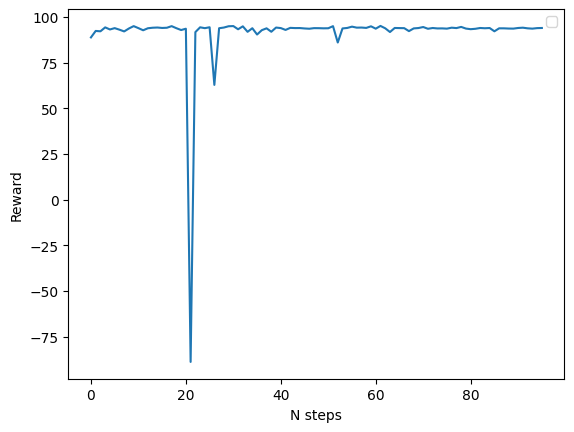

In [71]:

#plt.plot(reward_records, label='reward')
plt.plot(reward_callback.episode_rewards)
plt.xlabel('N steps')
plt.ylabel('Reward')
plt.legend()
plt.show()

Из пред-го

In [18]:
#Training and saving models along the way
TIMESTEPS = 20000
for i in range(10):
    model.learn(total_timesteps=TIMESTEPS, reset_num_timesteps=False, tb_log_name="DDPG", callback = )
    model.save(f"{models_dir}/{TIMESTEPS*i}")

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 999      |
|    ep_rew_mean     | -35.6    |
| time/              |          |
|    episodes        | 4        |
|    fps             | 37       |
|    time_elapsed    | 107      |
|    total_timesteps | 3996     |
| train/             |          |
|    actor_loss      | 0.0087   |
|    critic_loss     | 1.72e-06 |
|    learning_rate   | 0.001    |
|    n_updates       | 3895     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 999      |
|    ep_rew_mean     | -37.5    |
| time/              |          |
|    episodes        | 8        |
|    fps             | 36       |
|    time_elapsed    | 218      |
|    total_timesteps | 7992     |
| train/             |          |
|    actor_loss      | 0.00661  |
|    critic_loss     | 1.37e-06 |
|    learning_rate   | 0.001    |
|    n_updates       | 7891     |
--------------

KeyboardInterrupt: 

In [69]:
models_dir = "models/Mountain-1726248189.0127406"
model_path = f"{models_dir}/40000"
best_model = DDPG.load(model_path, env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [21]:
from tqdm import tqdm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
# Check model performance
# load the best model you observed from tensorboard - the one reach the goal/ obtaining highest return
models_dir = "models/Mountain-1726248189.0127406"
model_path = f"{models_dir}/40000"
best_model = DDPG.load(model_path, env=env)


obs = env.reset()

reward_records = []

for i in tqdm(range(5)):
  cum_reward = 0
  while True:
          action, _states = best_model.predict(obs)
          obs, rewards, dones, info = env.step(action)
          cum_reward += rewards
          env.render()
  reward_records.append(cum_reward)
  if np.average(reward_records[-2]) > 90:
        break

obs = env.reset()
while True:
    action, _states = best_model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()

  0%|          | 0/5 [07:10<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
# Generate recent 50 interval average
average_reward = []
for idx in range(len(reward_records)):
    avg_list = np.empty(shape=(1,), dtype=int)
    if idx < 50:
        avg_list = reward_records[:idx+1]
    else:
        avg_list = reward_records[idx-49:idx+1]
    average_reward.append(np.average(avg_list))
plt.plot(reward_records, label='reward')
plt.plot(average_reward, label='average reward')
plt.xlabel('N steps')
plt.ylabel('Reward')
plt.legend()
plt.show()